# Suicide rates of the world

## Data Analysis/cleaning

In [1]:
import pandas as pd
import numpy as np
from math import floor
import scipy.stats as sc
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid", palette="pastel")

In [3]:
df = pd.read_csv("../Data science/16BBF41_ALL_LATEST.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17518 entries, 0 to 17517
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IND_ID                  17518 non-null  object 
 1   IND_CODE                17518 non-null  object 
 2   IND_UUID                17518 non-null  object 
 3   IND_PER_CODE            17518 non-null  object 
 4   DIM_TIME                17518 non-null  int64  
 5   DIM_TIME_TYPE           17518 non-null  object 
 6   DIM_GEO_CODE_M49        17518 non-null  int64  
 7   DIM_GEO_CODE_TYPE       17518 non-null  object 
 8   DIM_PUBLISH_STATE_CODE  17518 non-null  object 
 9   IND_NAME                17518 non-null  object 
 10  GEO_NAME_SHORT          17518 non-null  object 
 11  DIM_SEX                 17518 non-null  object 
 12  DIM_AGE                 17518 non-null  object 
 13  RATE_PER_100000_N       17518 non-null  float64
 14  RATE_PER_100000_NL      11630 non-null

In [4]:
df.head()

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,DIM_AGE,RATE_PER_100000_N,RATE_PER_100000_NL,RATE_PER_100000_NU
0,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2013,YEAR,800,COUNTRY,PUBLISHED,Suicide deaths,Uganda,FEMALE,TOTAL,1.7100,0.992,2.7900
1,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2005,YEAR,818,COUNTRY,PUBLISHED,Suicide deaths,Egypt,FEMALE,TOTAL,2.3000,1.220,3.8000
2,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2015,YEAR,818,COUNTRY,PUBLISHED,Suicide deaths,Egypt,TOTAL,TOTAL,3.2800,1.570,6.1300
3,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2003,YEAR,858,COUNTRY,PUBLISHED,Suicide deaths,Uruguay,MALE,TOTAL,24.7415,21.443,28.3491
4,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2003,YEAR,860,COUNTRY,PUBLISHED,Suicide deaths,Uzbekistan,TOTAL,TOTAL,9.0200,7.600,10.5763


In [5]:
df.tail()

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,DIM_AGE,RATE_PER_100000_N,RATE_PER_100000_NL,RATE_PER_100000_NU
17513,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2019,YEAR,512,COUNTRY,PUBLISHED,Suicide deaths,Oman,MALE,Y75T84,15.96,NaN,NaN
17514,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2019,YEAR,12,COUNTRY,PUBLISHED,Suicide deaths,Algeria,MALE,Y75T84,5.89,NaN,NaN
17515,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2019,YEAR,426,COUNTRY,PUBLISHED,Suicide deaths,Lesotho,MALE,Y75T84,228.66,NaN,NaN
17516,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2019,YEAR,222,COUNTRY,PUBLISHED,Suicide deaths,El Salvador,TOTAL,Y75T84,7.60,NaN,NaN
17517,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2019,YEAR,624,COUNTRY,PUBLISHED,Suicide deaths,Guinea-Bissau,FEMALE,Y75T84,34.75,NaN,NaN


In [6]:
df.describe()

,DIM_TIME,DIM_GEO_CODE_M49,RATE_PER_100000_N,RATE_PER_100000_NL,RATE_PER_100000_NU
count,17518.000000,17518.000000,17518.000000,11630.000000,11630.000000
mean,2012.690718,447.186836,13.764983,7.659604,14.954606
std,6.498775,267.492760,24.488890,8.379310,15.785891
min,2000.000000,1.000000,0.000000,0.000000,0.000000
25%,2007.000000,214.000000,4.150000,2.550000,6.280000
50%,2015.000000,430.000000,7.960000,4.960000,10.938650
75%,2019.000000,688.000000,14.560000,9.710000,17.822725
max,2019.000000,958.000000,646.030000,94.106300,258.790500


In [7]:
df = df.drop(['IND_ID','IND_CODE','IND_UUID','IND_PER_CODE','DIM_TIME_TYPE','DIM_PUBLISH_STATE_CODE','IND_NAME','DIM_GEO_CODE_TYPE','DIM_GEO_CODE_M49'], axis = 1)

In [8]:
df

,DIM_TIME,GEO_NAME_SHORT,DIM_SEX,DIM_AGE,RATE_PER_100000_N,RATE_PER_100000_NL,RATE_PER_100000_NU
0,2013,Uganda,FEMALE,TOTAL,1.7100,0.992,2.7900
1,2005,Egypt,FEMALE,TOTAL,2.3000,1.220,3.8000
2,2015,Egypt,TOTAL,TOTAL,3.2800,1.570,6.1300
3,2003,Uruguay,MALE,TOTAL,24.7415,21.443,28.3491
4,2003,Uzbekistan,TOTAL,TOTAL,9.0200,7.600,10.5763
...,...,...,...,...,...,...,...
17513,2019,Oman,MALE,Y75T84,15.9600,NaN,NaN
17514,2019,Algeria,MALE,Y75T84,5.8900,NaN,NaN
17515,2019,Lesotho,MALE,Y75T84,228.6600,NaN,NaN
17516,2019,El Salvador,TOTAL,Y75T84,7.6000,NaN,NaN


### RATE_PER_100000_NU:
This indicate the lower limit of a confidence interval for the rate per 100,000 population. 
Confidence intervals provide a range within which the true rate is expected to fall, giving a measure of uncertainty around the estimate.

In [9]:
df['RATE_PER_100000_NU'].isnull().sum()

5888

### RATE_PER_100000_NL:
This represents the upper limit of a confidence interval for the rate per 100,000 population.

In [10]:
df['RATE_PER_100000_NL'].isnull().sum()

5888

### RATE_PER_100000_N: 
This typically represents the base rate per 100,000 population. It’s calculated by dividing the number of occurrences by the population at risk and then multiplying by 100,000.

In [11]:
df['RATE_PER_100000_N'].isnull().sum()

0

In [12]:
df = df.drop('RATE_PER_100000_NU', axis =1)
df

,DIM_TIME,GEO_NAME_SHORT,DIM_SEX,DIM_AGE,RATE_PER_100000_N,RATE_PER_100000_NL
0,2013,Uganda,FEMALE,TOTAL,1.7100,0.992
1,2005,Egypt,FEMALE,TOTAL,2.3000,1.220
2,2015,Egypt,TOTAL,TOTAL,3.2800,1.570
3,2003,Uruguay,MALE,TOTAL,24.7415,21.443
4,2003,Uzbekistan,TOTAL,TOTAL,9.0200,7.600
...,...,...,...,...,...,...
17513,2019,Oman,MALE,Y75T84,15.9600,NaN
17514,2019,Algeria,MALE,Y75T84,5.8900,NaN
17515,2019,Lesotho,MALE,Y75T84,228.6600,NaN
17516,2019,El Salvador,TOTAL,Y75T84,7.6000,NaN


In [13]:
df = df.drop('RATE_PER_100000_NL', axis =1)
df

,DIM_TIME,GEO_NAME_SHORT,DIM_SEX,DIM_AGE,RATE_PER_100000_N
0,2013,Uganda,FEMALE,TOTAL,1.7100
1,2005,Egypt,FEMALE,TOTAL,2.3000
2,2015,Egypt,TOTAL,TOTAL,3.2800
3,2003,Uruguay,MALE,TOTAL,24.7415
4,2003,Uzbekistan,TOTAL,TOTAL,9.0200
...,...,...,...,...,...
17513,2019,Oman,MALE,Y75T84,15.9600
17514,2019,Algeria,MALE,Y75T84,5.8900
17515,2019,Lesotho,MALE,Y75T84,228.6600
17516,2019,El Salvador,TOTAL,Y75T84,7.6000


In [14]:
df_new = df[df['DIM_SEX'] != 'TOTAL']
df_new

,DIM_TIME,GEO_NAME_SHORT,DIM_SEX,DIM_AGE,RATE_PER_100000_N
0,2013,Uganda,FEMALE,TOTAL,1.7100
1,2005,Egypt,FEMALE,TOTAL,2.3000
3,2003,Uruguay,MALE,TOTAL,24.7415
5,2018,Ghana,MALE,TOTAL,11.9277
7,2008,Grenada,FEMALE,TOTAL,0.6910
...,...,...,...,...,...
17512,2019,Vanuatu,FEMALE,Y75T84,17.2600
17513,2019,Oman,MALE,Y75T84,15.9600
17514,2019,Algeria,MALE,Y75T84,5.8900
17515,2019,Lesotho,MALE,Y75T84,228.6600


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11670 entries, 0 to 17517
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIM_TIME           11670 non-null  int64  
 1   GEO_NAME_SHORT     11670 non-null  object 
 2   DIM_SEX            11670 non-null  object 
 3   DIM_AGE            11670 non-null  object 
 4   RATE_PER_100000_N  11670 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 547.0+ KB


## 1. Suicide cases sorted by sex over the years

In [16]:
df_new.groupby('DIM_SEX')['RATE_PER_100000_N'].sum()

DIM_SEX
FEMALE     36656.7287
MALE      126824.1298
Name: RATE_PER_100000_N, dtype: float64

In [17]:
id_year = df_new.groupby(['DIM_TIME','RATE_PER_100000_N','DIM_SEX']).sum().reset_index()
id_year

,DIM_TIME,RATE_PER_100000_N,DIM_SEX,GEO_NAME_SHORT,DIM_AGE
0,2000,0.000,FEMALE,Antigua and Barbuda,TOTAL
1,2000,0.509,FEMALE,Saint Vincent and the Grenadines,TOTAL
2,2000,0.535,FEMALE,Grenada,TOTAL
3,2000,0.547,FEMALE,Barbados,TOTAL
4,2000,0.561,FEMALE,Brunei Darussalam,TOTAL
...,...,...,...,...,...
9833,2019,450.780,MALE,Zimbabwe,Y_GE85
9834,2019,507.010,MALE,Central African Republic,Y_GE85
9835,2019,518.160,MALE,Côte d'Ivoire,Y_GE85
9836,2019,600.740,MALE,Lesotho,Y_GE85


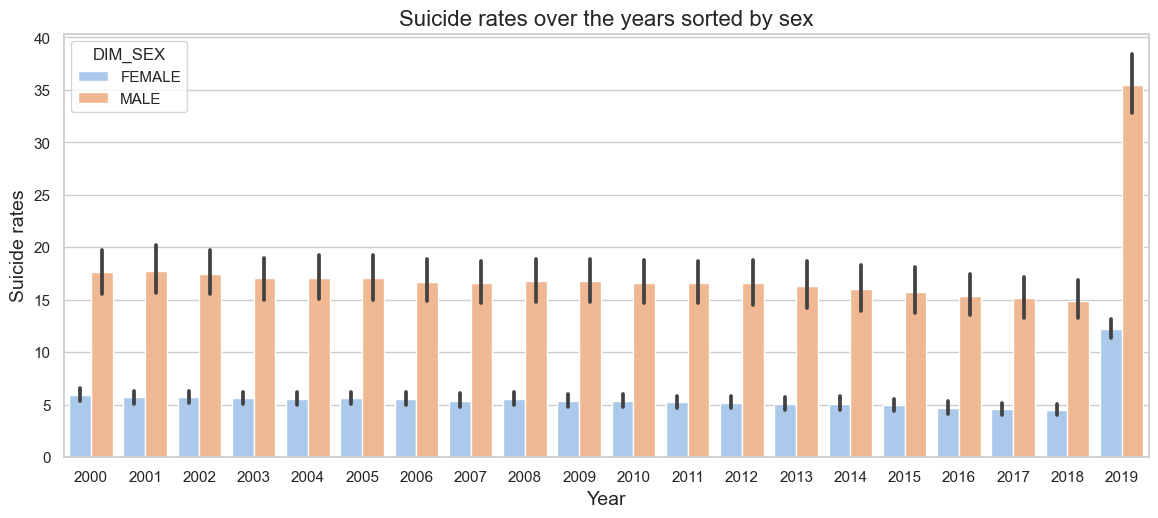

In [18]:
plt.figure(figsize=(14,5.5))
sns.barplot(data=id_year, x='DIM_TIME', y='RATE_PER_100000_N', hue='DIM_SEX')
plt.title('Suicide rates over the years sorted by sex',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Suicide rates',fontsize=14)
plt.show()

## 2. Which country has the most suicide cases?

In [19]:
max_death_rate_country = df.groupby('GEO_NAME_SHORT')['RATE_PER_100000_N'].max().reset_index()

In [20]:
country_with_max_death_rate = max_death_rate_country.loc[max_death_rate_country['RATE_PER_100000_N'].idxmax()]
country_with_max_death_rate

GEO_NAME_SHORT       Mozambique
RATE_PER_100000_N        646.03
Name: 118, dtype: object

In [21]:
df_country=df_new.groupby('GEO_NAME_SHORT')['RATE_PER_100000_N'].max().reset_index()
df_country

,GEO_NAME_SHORT,RATE_PER_100000_N
0,Afghanistan,28.6000
1,Africa,13.5030
2,Albania,26.0400
3,Algeria,10.8000
4,Americas,15.2801
...,...,...
189,Western Pacific,15.2900
190,World,16.6974
191,Yemen,31.1200
192,Zambia,402.9800


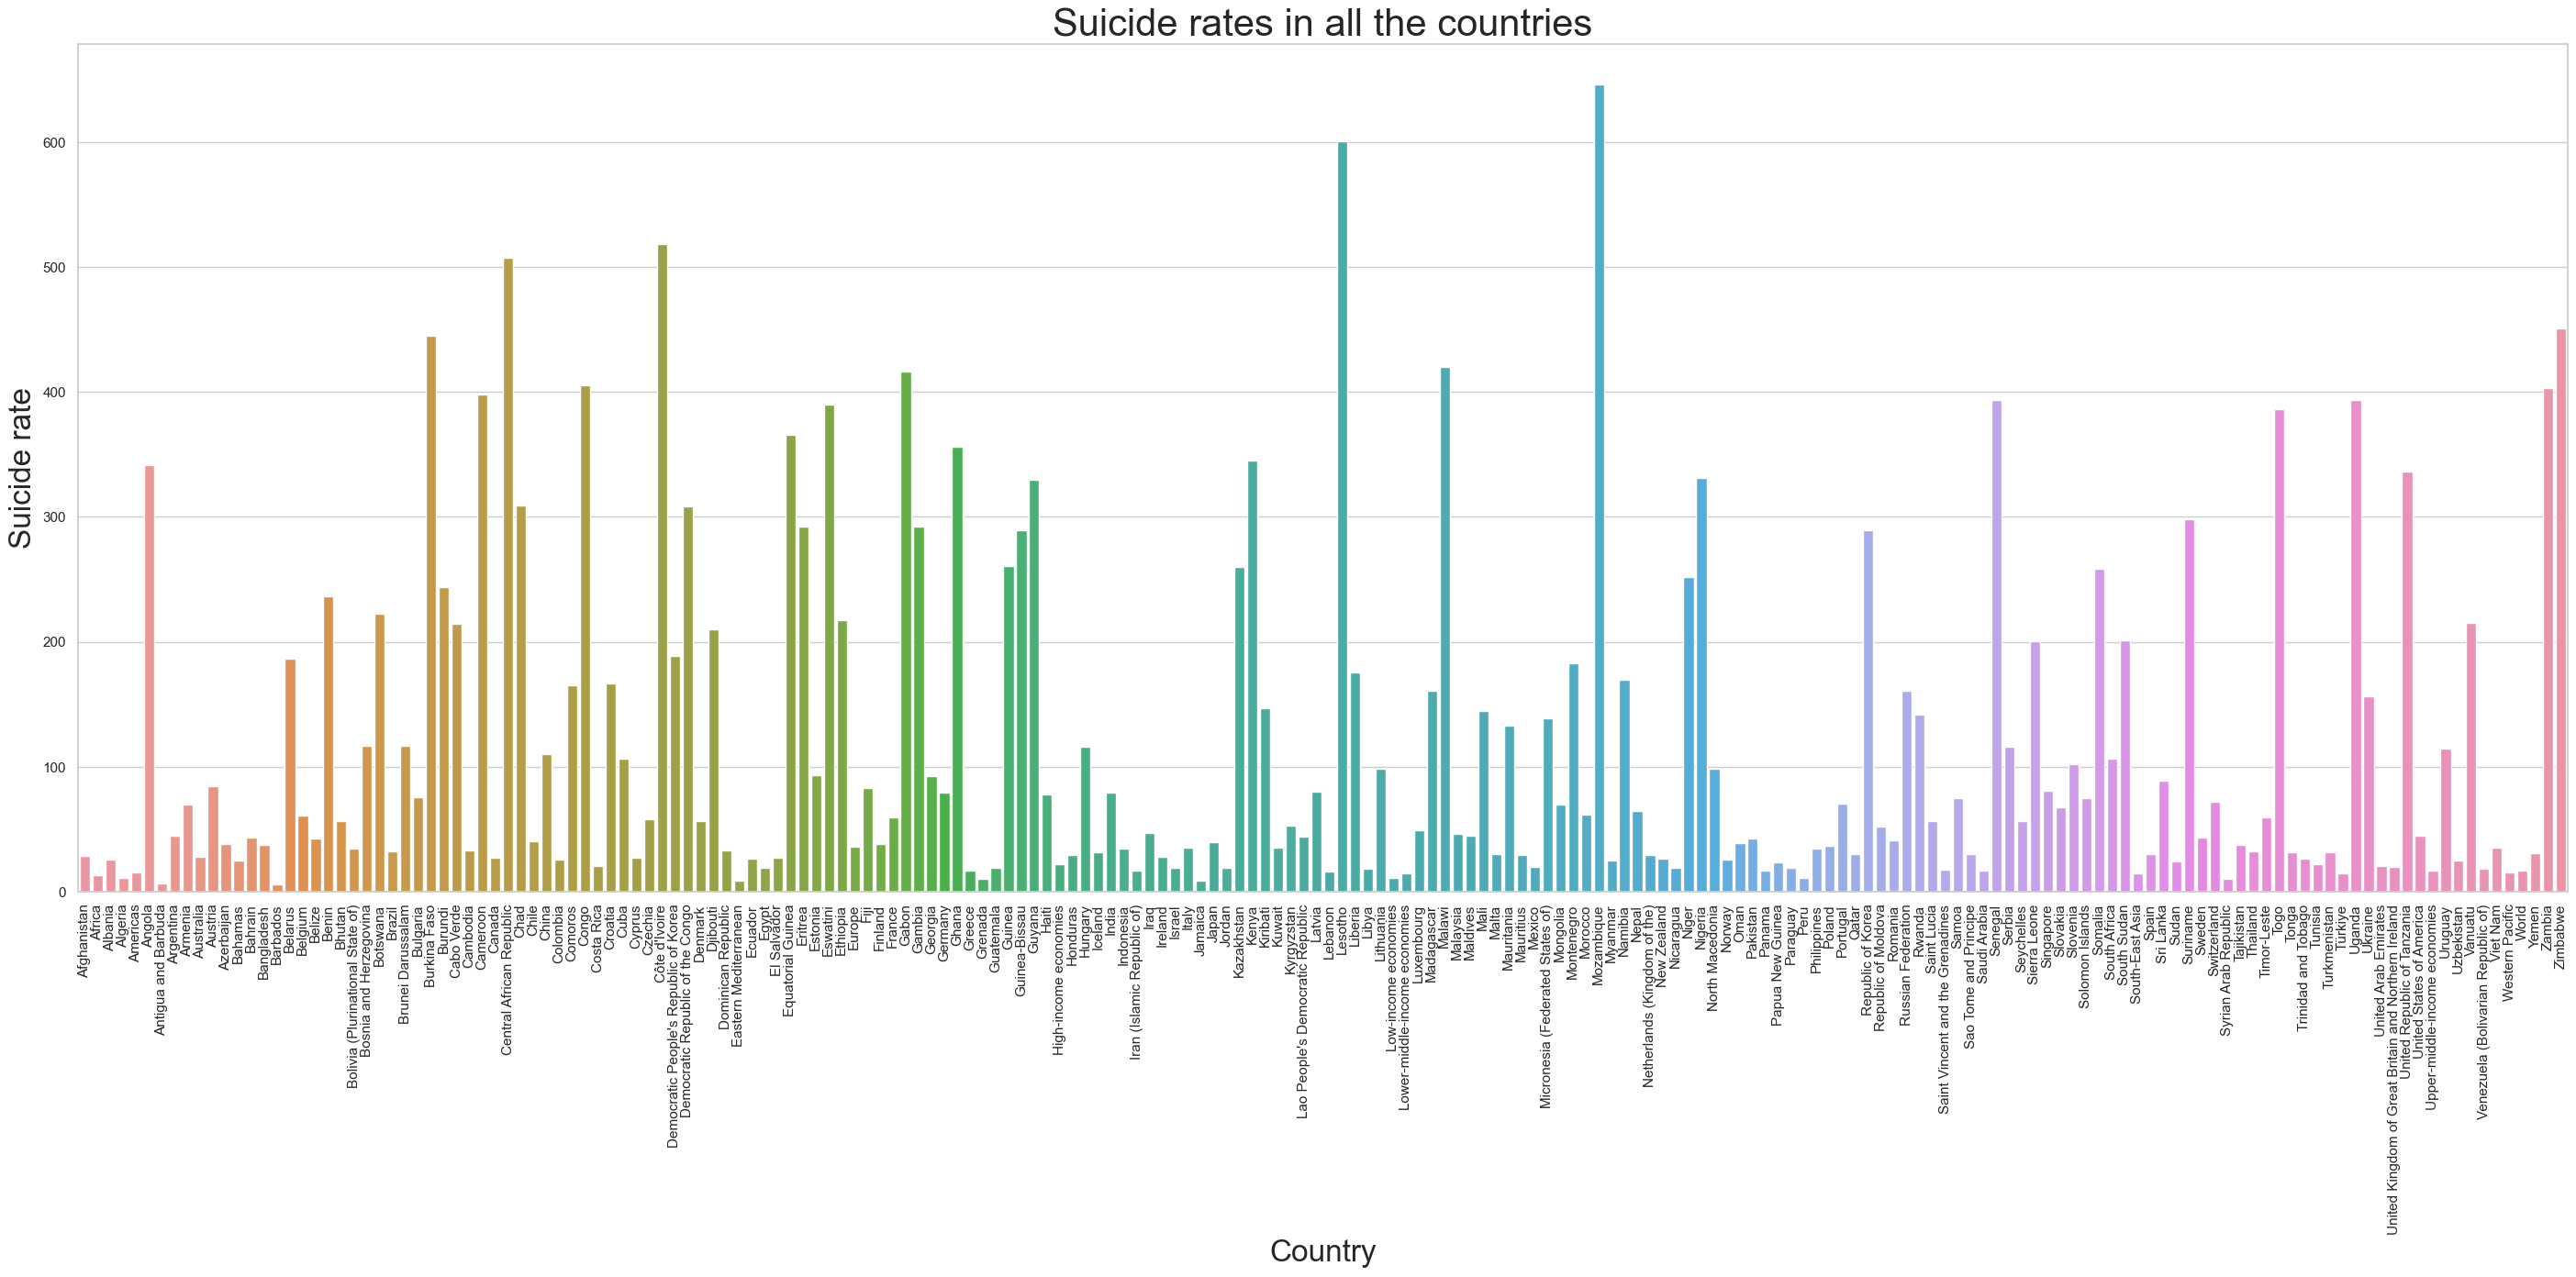

In [22]:
plt.figure(figsize=(35,12))
sns.barplot(data = df_country, x='GEO_NAME_SHORT', y='RATE_PER_100000_N')
plt.title('Suicide rates in all the countries',fontsize=30)
plt.xlabel('Country',fontsize=24)
plt.ylabel('Suicide rate',fontsize=24)
plt.xticks(rotation=90)
plt.show()

## 3. Which age range has the most suicide rates?

In [23]:
df_new2 = df_new[df_new['DIM_AGE'] != 'TOTAL']
df_new2

,DIM_TIME,GEO_NAME_SHORT,DIM_SEX,DIM_AGE,RATE_PER_100000_N
11630,2019,United Kingdom of Great Britain and Northern I...,MALE,Y_GE85,14.66
11635,2019,Djibouti,FEMALE,Y_GE85,69.12
11638,2019,Bulgaria,MALE,Y_GE85,75.38
11639,2019,Antigua and Barbuda,FEMALE,Y_GE85,0.00
11641,2019,Lao People's Democratic Republic,MALE,Y_GE85,44.02
...,...,...,...,...,...
17512,2019,Vanuatu,FEMALE,Y75T84,17.26
17513,2019,Oman,MALE,Y75T84,15.96
17514,2019,Algeria,MALE,Y75T84,5.89
17515,2019,Lesotho,MALE,Y75T84,228.66


In [24]:
age_suicide_rates = df_new2.groupby('DIM_AGE')['RATE_PER_100000_N'].mean().reset_index()
age_suicide_rates

,DIM_AGE,RATE_PER_100000_N
0,Y15T19,6.121289
1,Y15T24,7.867989
2,Y15T29,8.880452
3,Y25T34,10.950056
4,Y30T49,12.931061
5,Y35T44,13.316328
6,Y45T54,16.004090
7,Y55T64,18.823494
8,Y65T74,22.993390
9,Y75T84,32.116459


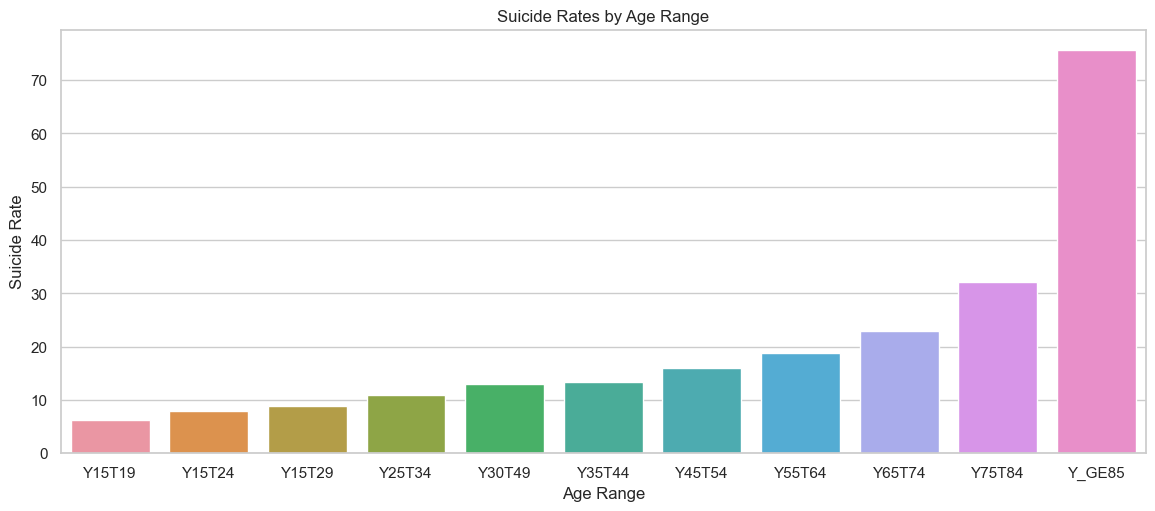

In [25]:
plt.figure(figsize=(14,5.5))
sns.barplot(data=age_suicide_rates, x='DIM_AGE', y='RATE_PER_100000_N')
plt.xlabel('Age Range')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rates by Age Range')
plt.show()

## 4. Canada death rates over the years

In [26]:
df_canada = df_new[df_new['GEO_NAME_SHORT'] == 'Canada']
canada_death_rates = df_canada.groupby('DIM_TIME')['RATE_PER_100000_N'].mean().reset_index()
canada_death_rates

,DIM_TIME,RATE_PER_100000_N
0,2000,11.993100
1,2001,12.309200
2,2002,12.004150
3,2003,12.484850
4,2004,11.762550
5,2005,12.239700
6,2006,11.272650
7,2007,11.520650
8,2008,11.594450
9,2009,12.034150


C:\Users\taefa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\taefa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


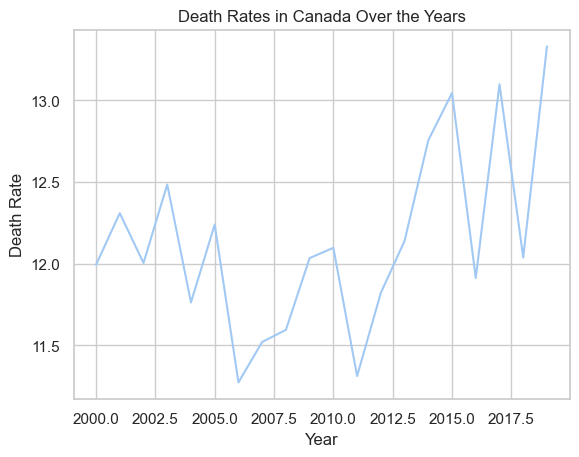

In [27]:
sns.lineplot(data=canada_death_rates, x='DIM_TIME', y='RATE_PER_100000_N')
plt.xlabel('Year')
plt.ylabel('Death Rate')
plt.title('Death Rates in Canada Over the Years')
plt.show()

## 5. Age range of suicide rates of Canada in 2019

In [28]:
df_can = df_canada[df_canada['DIM_AGE'] != 'TOTAL']

In [29]:
canada_age_suicide_rates = df_can.groupby(['DIM_TIME', 'DIM_AGE'])['RATE_PER_100000_N'].mean().reset_index()
canada_age_suicide_rates

,DIM_TIME,DIM_AGE,RATE_PER_100000_N
0,2019,Y15T19,8.540
1,2019,Y15T24,10.960
2,2019,Y15T29,12.845
3,2019,Y25T34,16.220
4,2019,Y30T49,14.620
5,2019,Y35T44,13.055
6,2019,Y45T54,16.080
7,2019,Y55T64,15.025
8,2019,Y65T74,10.685
9,2019,Y75T84,13.845


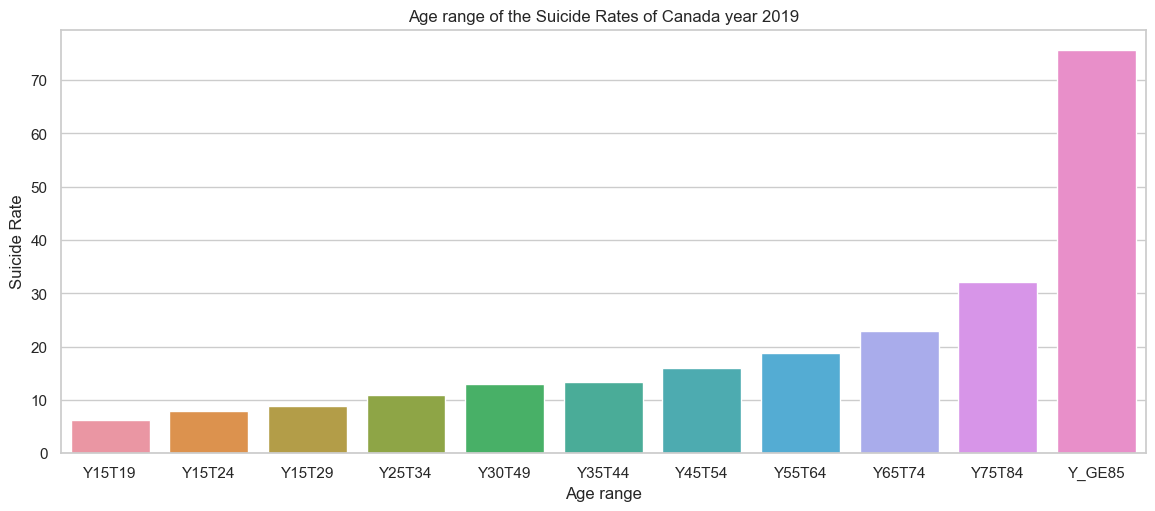

In [30]:
plt.figure(figsize=(14,5.5))
sns.barplot(data=age_suicide_rates, x='DIM_AGE', y='RATE_PER_100000_N')
plt.xlabel('Age range')
plt.ylabel('Suicide Rate')
plt.title('Age range of the Suicide Rates of Canada year 2019')
plt.show()

## Thank you!